In [4]:
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt


In [5]:
# Load pre-trained models
age_model = tf.keras.models.load_model('Age-VGG16.keras')  
gender_model = tf.keras.models.load_model('Gender-ResNet152.keras')  


In [6]:
# Define the age and gender classes
age_classes = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
gender_classes = ['Male', 'Female']


In [7]:
# Load the face detection cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

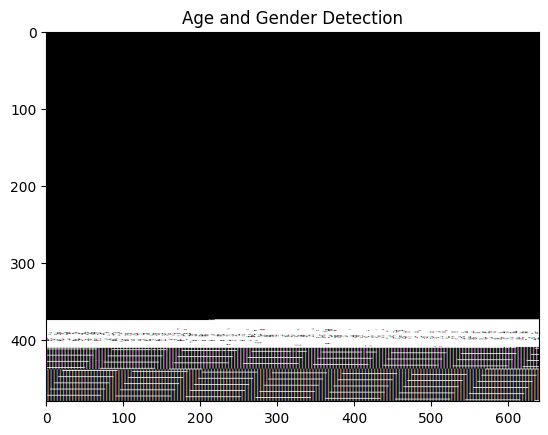

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1338: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [12]:
# Initialize the camera
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Check if the frame is empty
    if not ret:
        print("Error: Couldn't read frame from the camera.")
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face region
        face_roi = frame[y:y+h, x:x+w]

        # Preprocess the face for age and gender prediction
        face = cv2.resize(face_roi, (224, 224))
        face = np.expand_dims(face, axis=0)
        face = face / 255.0

        # Predict age and gender
        age_pred = age_model.predict(face)
        gender_pred = gender_model.predict(face)

        # Get the predicted age and gender classes
        age_class = age_classes[np.argmax(age_pred)]
        gender_class = gender_classes[np.argmax(gender_pred)]

        # Display the age and gender on the frame
        text = f'Age: {age_class}, Gender: {gender_class}'
        cv2.putText(frame, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2, cv2.LINE_AA)

        # Draw a rectangle around the face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display the frame using Matplotlib
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Age and Gender Detection')
    plt.show()

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera